In [1]:
import io
import json
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
image=cv2.imread("certificate.jpg")

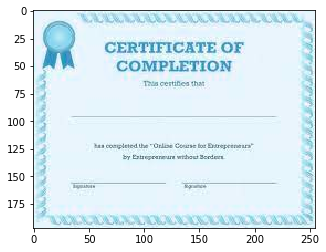

In [3]:
plt.imshow(image)

In [4]:
originaliamge = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

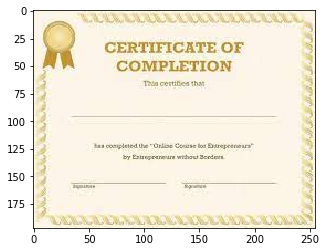

In [6]:
plt.imshow(originaliamge)

In [7]:
height,width,_=originaliamge.shape

In [8]:
height
width,height

(255, 197)

In [15]:
img=cv2.imread("newtext.png")

In [17]:
originaliamge = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

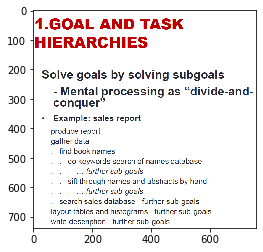

In [18]:
plt.imshow(originaliamge)

In [19]:
height,width,_=originaliamge.shape

In [20]:
height
width,height

(757, 738)

In [21]:
url_api= "https://api.ocr.space/parse/image"

In [26]:
_,compressesdimage=cv2.imencode(".png",originaliamge,[1,90])
file_bytes = io.BytesIO(compressesdimage)

In [27]:
result = requests.post(url_api,
                    files = {"newtext.png":file_bytes},
                    data={"apikey":"eb516ebif288957","language":"eng"})

In [28]:
result = result.content.decode()
result = json.loads(result)

In [29]:
result

{'ParsedResults': [{'TextOverlay': {'Lines': [],
    'HasOverlay': False,
    'Message': 'Text overlay is not provided as it is not requested'},
   'TextOrientation': '0',
   'FileParseExitCode': 1,
   'ParsedText': 'I.GOAL AND TASK\r\nHIERARCHIES\r\nSolve goals by solving subgoals\r\n- Mental processing as "divide-and-\r\nconquer"\r\nExample: sales report\r\nproduce report\r\ngather data\r\nfind book names\r\ndo keywords search of names database\r\nfurther sub-goals\r\nsift through names and abstracts by hand\r\nfurther sub-goals\r\nsearch sales database - further sub-goals\r\nlayout tables and histograms - further sub-goals\r\nwrite description - further sub-goals\r\n',
   'ErrorMessage': '',
   'ErrorDetails': ''}],
 'OCRExitCode': 1,
 'IsErroredOnProcessing': False,
 'ProcessingTimeInMilliseconds': '312',
 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}

In [30]:
parsed_result = result.get("ParsedResults")[0]
text_detected = parsed_result.get("ParsedText")
text_detected

'I.GOAL AND TASK\r\nHIERARCHIES\r\nSolve goals by solving subgoals\r\n- Mental processing as "divide-and-\r\nconquer"\r\nExample: sales report\r\nproduce report\r\ngather data\r\nfind book names\r\ndo keywords search of names database\r\nfurther sub-goals\r\nsift through names and abstracts by hand\r\nfurther sub-goals\r\nsearch sales database - further sub-goals\r\nlayout tables and histograms - further sub-goals\r\nwrite description - further sub-goals\r\n'

In [31]:
!pip install pytesseract --user

  Running setup.py bdist_wheel for pytesseract: started
  Running setup.py bdist_wheel for pytesseract: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\81\20\7e\1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


  The script pytesseract.exe is installed in 'C:\Users\user\AppData\Roaming\Python\Python37\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [33]:
import pytesseract

In [38]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Users\user\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [39]:
text = pytesseract.image_to_string(originaliamge)
print(text)

1.GOAL AND TASK
HIERARCHIES

Solve goals by solving subgoals

- Mental processing as “divide-and-
conquer”
« Example: sales report

produce report
gather data
. find book names
. do keywords search of names database
... further sub-goals
. sift through names and abstracts by hand
... further sub-goals
. search sales database - further sub-goals
layout tables and histograms - further sub-goals
write description - further sub-goals

